In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [19]:
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')
df = df.drop(["time", "Unnamed: 0"], axis = 1)
df.columns

Index(['pedestrians count', 'temperature in ºc', 'holiday', 'school holiday',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       ...
       'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53',
       'PC54'],
      dtype='object', length=109)

In [20]:
#Features of our dataset
#X = df[df.columns[1:]]
#Output with PCA features k= 0.999
X = df[df.columns[55:103]]

# Output to predict
y = df["pedestrians count"]
type(X)
X.shape

(15358, 48)

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)

In [22]:
from sklearn.preprocessing import StandardScaler

# Scale the inputs to standardize the values
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow import keras


# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (X[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-21 13:57:02.517589: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-21 13:57:02.519158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


KeyError: 1

In [8]:
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               5500      
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12,096
Trainable params: 12,096
Non-trainable params: 0
_________________________________________________________________
None


In [9]:

# compiling the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Training the model
model.fit(tf.expand_dims(Xtrain, axis=-1), ytrain, epochs=50,verbose=1, validation_split=0.3)

Epoch 1/50


2022-11-20 20:12:12.109069: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-20 20:12:12.473519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


236/236 [==============================] - ETA: 0s - loss: 2046.2219 - mae: 2046.2219

2022-11-20 20:12:16.618523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


236/236 [==============================] - 5s 11ms/step - loss: 2046.2219 - mae: 2046.2219 - val_loss: 982.9120 - val_mae: 982.9120
Epoch 2/50
236/236 [==============================] - 2s 9ms/step - loss: 728.6403 - mae: 728.6403 - val_loss: 578.2560 - val_mae: 578.2560
Epoch 3/50
236/236 [==============================] - 2s 9ms/step - loss: 551.0761 - mae: 551.0761 - val_loss: 500.4526 - val_mae: 500.4526
Epoch 4/50
236/236 [==============================] - 2s 8ms/step - loss: 495.3535 - mae: 495.3535 - val_loss: 470.8634 - val_mae: 470.8634
Epoch 5/50
236/236 [==============================] - 2s 11ms/step - loss: 460.6804 - mae: 460.6804 - val_loss: 446.3636 - val_mae: 446.3636
Epoch 6/50
236/236 [==============================] - 2s 8ms/step - loss: 436.8061 - mae: 436.8061 - val_loss: 427.5078 - val_mae: 427.5078
Epoch 7/50
236/236 [==============================] - 2s 9ms/step - loss: 417.1170 - mae: 417.1170 - val_loss: 423.2799 - val_mae: 423.2799
Epoch 8/50
236/236 [=======

In [10]:
ypred = model.predict(Xtest)

 89/144 [=================>............] - ETA: 0s

2022-11-20 20:13:49.858866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 2ms/step


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
#print('R score is :', r2_score(ytest, ypred))

#Old Evaluation
pred_train = model.predict(Xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train)))

ypred = model.predict(Xtest)
print(np.sqrt(mean_squared_error(ytest,ypred)))

 87/336 [======>.......................] - ETA: 0s

2022-11-20 20:13:50.257104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


336/336 [==============================] - 1s 2ms/step
794.7511267617456
144/144 [==============================] - 0s 2ms/step
747.1983165710888


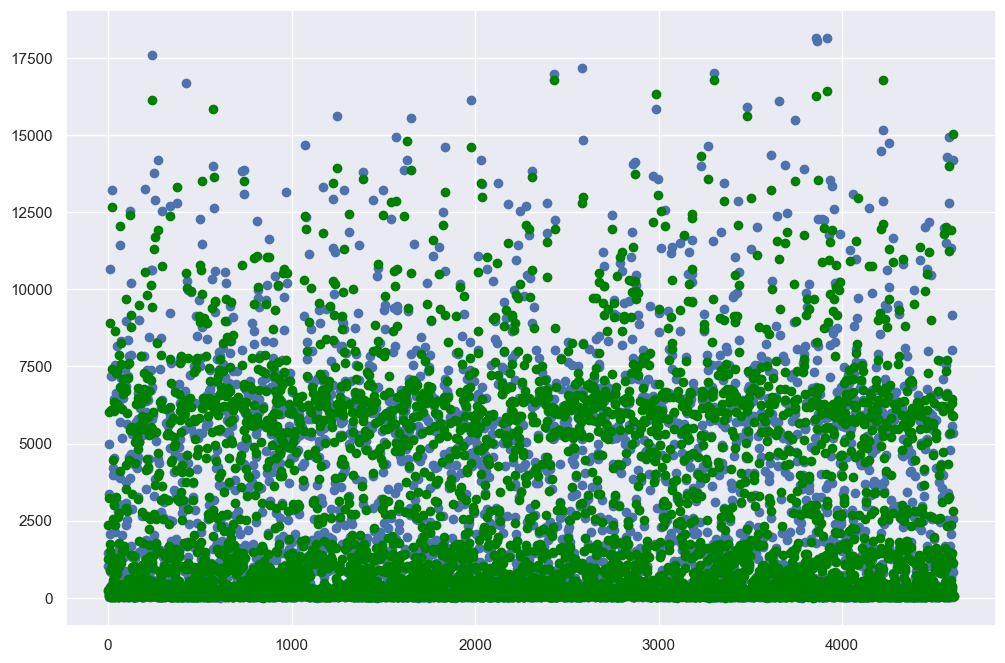

In [12]:
#Visualize the results predictions vs actual values
#Create a 
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

# ypred = pd.Series(ypred) 

plt.scatter(xs, ytest, color ='b')

plt.scatter(xs, ypred, color ='green')

plt.show()

In [13]:
#Find the optimal values for the NN
from tensorflow import keras
import keras_tuner as kt
